<a href="https://colab.research.google.com/github/eledesma/EstadisticaICESI/blob/main/Sesi%C3%B3n_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

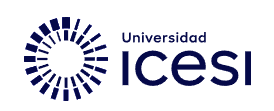

#<big><big> Fundamentos de Estadística</big></big><br><small>

**Facultad de Ingeniería / Escuela de diseño, Ingenieria y Ciencias Aplicadas**

### Certificación</small><br><small>
#### **Sesión** #4


# Análisis Multivariado

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Ejemplo data de Tasa de Desempleo

In [ ]:
data="/content/datosEmpleo.csv"
df = pd.read_csv(data, delimiter=';', decimal=',')

df.head()


,mes,TD_13ciudades,Ocupados,Desocupados,Inactivos
0,ene-01,20.9,6.924,1.835,4.601
1,feb-01,19.9,7.038,1.748,4.597
2,mar-01,19.2,6.946,1.653,4.807
3,abr-01,17.9,6.973,1.519,4.937
4,may-01,17.9,6.994,1.530,4.929


In [ ]:
df.head(10)

,mes,TD_13ciudades,Ocupados,Desocupados,Inactivos
0,ene-01,20.9,6.924,1.835,4.601
1,feb-01,19.9,7.038,1.748,4.597
2,mar-01,19.2,6.946,1.653,4.807
3,abr-01,17.9,6.973,1.519,4.937
4,may-01,17.9,6.994,1.530,4.929
5,jun-01,18.7,7.014,1.608,4.854
6,jul-01,17.6,7.139,1.527,4.835
7,ago-01,17.8,7.139,1.550,4.835
8,sep-01,17.8,7.181,1.559,4.808
9,oct-01,16.8,7.386,1.491,4.694


In [ ]:
# Seleccionar las columnas numéricas para evaluar la normalidad
numeric_columns = df.select_dtypes(include='number')

# Realizar pruebas de normalidad (Shapiro-Wilk y Kolmogorov-Smirnov) para cada columna
results = []
for column in numeric_columns.columns:
    shapiro_test = stats.shapiro(numeric_columns[column])
    ks_test = stats.kstest(numeric_columns[column], 'norm', args=(numeric_columns[column].mean(), numeric_columns[column].std()))
    results.append({
        'Variable': column,
        'Shapiro-Wilk Statistic': shapiro_test.statistic,
        'Shapiro-Wilk p-value': shapiro_test.pvalue,
        'Kolmogorov-Smirnov Statistic': ks_test.statistic,
        'Kolmogorov-Smirnov p-value': ks_test.pvalue
    })

results_df = pd.DataFrame(results)

# Mostrar los resultados
results_df

,Variable,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,Kolmogorov-Smirnov Statistic,Kolmogorov-Smirnov p-value
0,TD_13ciudades,0.923461,2.902094e-09,0.114048,0.005994


Debido a que los $p$ valores son menores a $p<0.05$

# Matriz de Correlación

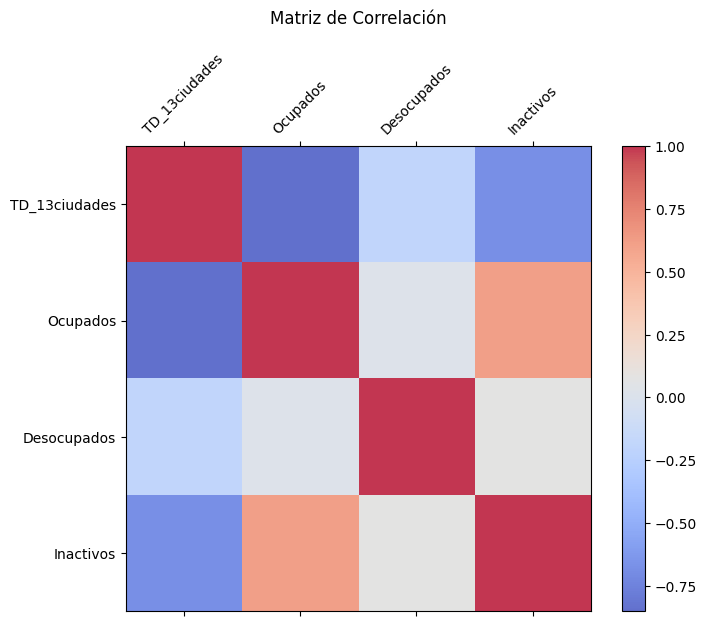

In [ ]:
columns_to_analyze = ['TD_13ciudades', 'Ocupados', 'Desocupados', 'Inactivos']
df_numeric = df[columns_to_analyze].apply(pd.to_numeric)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm', alpha=0.8)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Matriz de Correlación", pad=20)
plt.show()



La matriz de correlación muestra las relaciones entre las variables TD_13ciudades, Ocupados, Desocupados e Inactivos. Se observa que existe una fuerte correlación positiva entre TD_13ciudades y Ocupados, lo que sugiere que a medida que aumenta el indicador de las 13 ciudades, también aumenta el número de personas ocupadas, reflejando una posible relación directa entre estas variables.

Por otro lado, Ocupados tiene una correlación negativa con Desocupados, indicando que cuando aumenta el empleo, disminuye el desempleo, lo cual es consistente con las dinámicas esperadas del mercado laboral. La relación entre Ocupados e Inactivos muestra una correlación más débil, lo que sugiere que el número de inactivos no está tan directamente relacionado con el empleo como lo está con el desempleo.

Estas correlaciones proporcionan información valiosa para analizar el comportamiento del mercado laboral en las principales ciudades del país y podrían ser útiles para la toma de decisiones en políticas públicas o estrategias de empleo.

---------------------------------------